# Курсовая работа № 3
## Блок ML Beginner
<br>

**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [30]:
# Предложенная задание является задачей по классификации данных
# Импортируем данные в dataframe и посмотрим на них
telecom_users = pd.read_csv('telecom_users.csv', index_col=0)
telecom_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [31]:
telecom_users.shape
# Таблица состоит из 5986 строк и 21 столбца

(5986, 21)

In [32]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [33]:
# Заменим Yes/No в колонках на цифры
telecom_users.Partner = (telecom_users.Partner == "Yes").astype(int)
telecom_users.Dependents = (telecom_users.Dependents == "Yes").astype(int)
telecom_users.PhoneService = (telecom_users.PhoneService == "Yes").astype(int)
telecom_users.PaperlessBilling = (telecom_users.PaperlessBilling == "Yes").astype(int)
telecom_users.Churn = (telecom_users.Churn == "Yes").astype(int)
telecom_users['InternetServiceType'] = telecom_users.InternetService
telecom_users.InternetService = (telecom_users.InternetService != "No").astype(int)
cols4cat = ['gender','Contract','PaymentMethod','InternetServiceType','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# а также строковые фичи на целые числа
telecom_users[cols4cat] = telecom_users[cols4cat].astype('category')
cat_columns = telecom_users.select_dtypes(['category']).columns
telecom_users[cat_columns] = telecom_users[cat_columns].apply(lambda x: x.cat.codes)
telecom_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceType
1869,7010-BRBUU,1,0,1,1,72,1,2,0,1,...,1,1,1,2,0,1,24.10,1734.65,0,2
4528,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,0,2,0,0,1,1,88.15,3973.2,0,1
6344,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,1,0,74.95,2869.85,1,1
6739,6994-KERXL,1,0,0,0,4,1,0,1,0,...,0,0,2,0,1,2,55.90,238.5,0,0
432,2181-UAESM,1,0,0,0,2,1,0,1,2,...,0,0,0,0,0,2,53.45,119.5,0,0


In [34]:
# Посчитаем, сколько в среднем каждый клиент платит компании в месяц, чтобы сравнить это с текущими платежами
# Есть 10 строк с отсутствующими данными, это новые клиенты. Удалим их.
telecom_users.drop(telecom_users[telecom_users.tenure == 0].index, inplace=True)
telecom_users['TotalCharges'] = telecom_users['TotalCharges'].astype(float)
# Посчитаем, сколько в среднем каждый клиент заплатил компании чтобы сравнить это с текущими платежами
telecom_users['AvgCharges'] = telecom_users['TotalCharges'] / telecom_users['tenure']
telecom_users['Avg_vs_Monthly'] = (telecom_users['MonthlyCharges'] - telecom_users['AvgCharges']) / telecom_users['AvgCharges']
# А также разложим на составляющие customerID, вдруг кодировка что-то значит
telecom_users['CustomerNo'] = telecom_users['customerID'].apply(lambda x: int(x[:4]))
telecom_users['CustomerA'] = telecom_users['customerID'].apply(lambda x: str(x[5:6]))
telecom_users['CustomerB'] = telecom_users['customerID'].apply(lambda x: str(x[6:7]))
telecom_users['CustomerC'] = telecom_users['customerID'].apply(lambda x: str(x[7:8]))
telecom_users['CustomerD'] = telecom_users['customerID'].apply(lambda x: str(x[8:9]))
telecom_users['CustomerE'] = telecom_users['customerID'].apply(lambda x: str(x[9:10]))


In [35]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           5976 non-null   object 
 1   gender               5976 non-null   int8   
 2   SeniorCitizen        5976 non-null   int64  
 3   Partner              5976 non-null   int64  
 4   Dependents           5976 non-null   int64  
 5   tenure               5976 non-null   int64  
 6   PhoneService         5976 non-null   int64  
 7   MultipleLines        5976 non-null   int8   
 8   InternetService      5976 non-null   int64  
 9   OnlineSecurity       5976 non-null   int8   
 10  OnlineBackup         5976 non-null   int8   
 11  DeviceProtection     5976 non-null   int8   
 12  TechSupport          5976 non-null   int8   
 13  StreamingTV          5976 non-null   int8   
 14  StreamingMovies      5976 non-null   int8   
 15  Contract             5976 non-null  

In [36]:
telecom_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,InternetServiceType,AvgCharges,Avg_vs_Monthly,CustomerNo,CustomerA,CustomerB,CustomerC,CustomerD,CustomerE
1869,7010-BRBUU,1,0,1,1,72,1,2,0,1,...,0,2,24.092361,0.000317,7010,B,R,B,U,U
4528,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,0,1,90.300000,-0.023810,9688,Y,G,X,V,R
6344,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,1,1,75.522368,-0.007579,9286,D,O,J,G,F
6739,6994-KERXL,1,0,0,0,4,1,0,1,0,...,0,0,59.625000,-0.062474,6994,K,E,R,X,L
432,2181-UAESM,1,0,0,0,2,1,0,1,2,...,0,0,59.750000,-0.105439,2181,U,A,E,S,M


In [37]:
telecom_users.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetServiceType,AvgCharges,Avg_vs_Monthly,CustomerNo
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,...,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.509371,0.161647,0.484605,0.298025,32.523092,0.901606,0.950134,0.784973,0.786981,0.913487,...,0.692604,0.589859,1.572959,64.846687,2298.060617,0.265562,0.869645,64.844044,0.002549,4982.730087
std,0.499954,0.368157,0.499805,0.457429,24.500858,0.297871,0.948299,0.410875,0.860070,0.881827,...,0.832028,0.491900,1.066664,30.107576,2274.127165,0.441669,0.737229,30.218818,0.051380,2853.752913
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,13.775000,-0.346804,2.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,35.750000,404.312500,0.000000,0.000000,36.359279,-0.019156,2527.250000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,2.000000,70.425000,1412.150000,0.000000,1.000000,70.498684,0.000000,4987.500000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,89.900000,3846.962500,1.000000,1.000000,90.302500,0.020842,7432.500000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000,2.000000,121.400000,0.450628,9993.000000


# 2. Исследование зависимостей и формулирование гипотез

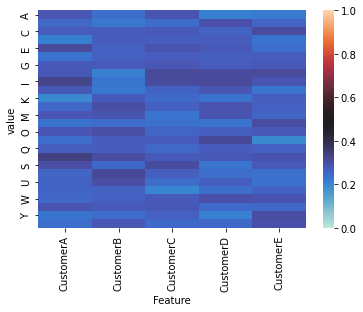

In [38]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

#Отсеем неперспктивные для дальнейшего посторения моделей признаки, для этого рассмотрим несколько гипотез
#Значение закодированной в customerID информации:
df1 = telecom_users.iloc[:, [20,25,26,27,28,29]]
data = pd.melt(df1, 'Churn', var_name='Feature')
data = data.groupby(['Feature','value']).agg(lambda x: sum(x)/len(x))['Churn'].reset_index()
data = data.pivot(index='value', columns='Feature', values='Churn')
sns.heatmap(data, vmin=0, vmax=1, center=0.5)
plt.show()

In [39]:
#Буквы не показывают какой-либо значимой связи с оттоком, а значит их можно исключить из дальнейшего анализа
telecom_users = telecom_users.drop(telecom_users.columns[[0,25,26,27,28,29]], axis=1)

/Users/koytoora/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


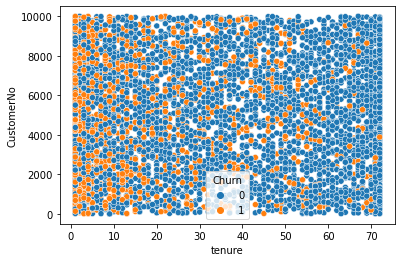

In [40]:
#Оставшаяся часть в коде клиента, скорее всего, его порядковый номер. Тогда она прямо коррелирует с количеством месяцев и не содержит в себе дополнительной ценности
sns.scatterplot(telecom_users['tenure'], telecom_users['CustomerNo'], hue=telecom_users['Churn'])
plt.show()
#Это не так, но и зависимости между этим числом и оттоком нет, в отличии от показателя tenure
#Удалим также и колонку CustomerNo
telecom_users = telecom_users.drop('CustomerNo', axis=1)


/Users/koytoora/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


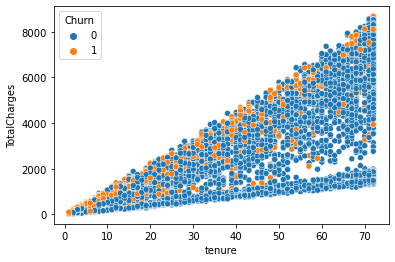

In [41]:
#Показатель суммарного дохода от каждого абонента сам по себе не очень интересен, так как напрямую зависит от кол-ва месяцев,
#в течении которых клиент остается с компанией. Тем не менее график рассеяния показывает некоторые интересные закономерности связанные
#с тем, что наибольшая вероятность уйти у клиентов с большим набором услуг и большей суммой ежемеячного чека
sns.scatterplot(telecom_users['tenure'], telecom_users['TotalCharges'], hue=telecom_users['Churn'])
plt.show()

In [42]:
#Удалим колонку TotalCharges
telecom_users = telecom_users.drop('TotalCharges', axis=1)

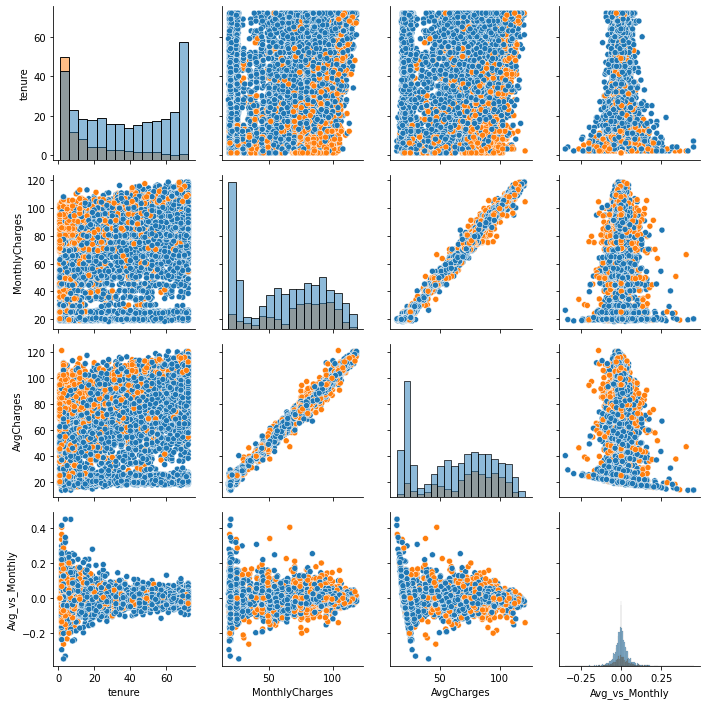

In [43]:
# посмотрим на взаимосвязь численных признаков (исключив пока категорийные)
g = sns.PairGrid(telecom_users.iloc[:, [4,17,18,20,21]], hue="Churn")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
#Есть связь между стажем, месячными расходами на услуги и оттоком
#Это подтверждает ранее сделанный вывод о том,
#что клиенты, пользующиес меньшим количеством платных услуг (напрмиер, не пользующиеся интернетом) имеют меньше склонности к уходу
#Удалим колонки AvgCharges и Avg_vs_Monthly
telecom_users = telecom_users.drop(['AvgCharges','Avg_vs_Monthly'], axis=1)

In [44]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5976 non-null   int8   
 1   SeniorCitizen        5976 non-null   int64  
 2   Partner              5976 non-null   int64  
 3   Dependents           5976 non-null   int64  
 4   tenure               5976 non-null   int64  
 5   PhoneService         5976 non-null   int64  
 6   MultipleLines        5976 non-null   int8   
 7   InternetService      5976 non-null   int64  
 8   OnlineSecurity       5976 non-null   int8   
 9   OnlineBackup         5976 non-null   int8   
 10  DeviceProtection     5976 non-null   int8   
 11  TechSupport          5976 non-null   int8   
 12  StreamingTV          5976 non-null   int8   
 13  StreamingMovies      5976 non-null   int8   
 14  Contract             5976 non-null   int8   
 15  PaperlessBilling     5976 non-null  

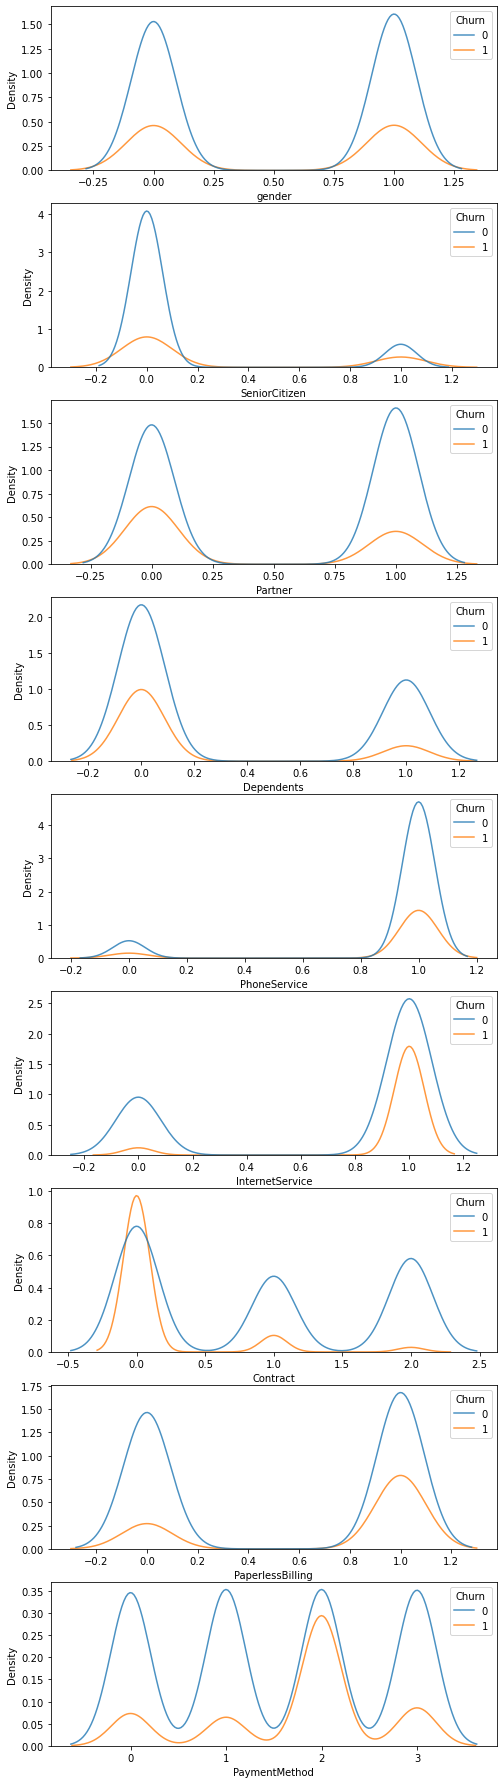

In [45]:
#В датасете довольно много категорийных признаков, посмотрим на них отдельно
#Пол клиента и его семейное положение мало влияют на вероятность оттока, среди остальных есть различия по доле оттока
#между различными группами, особенно выделяются - тип контракта, метод оплаты и наличие услуги доступа в интернет
#Оставим для дальнейшей работы такие признаки как SeniorCitizen, Dependents,
#PhoneService, InternetService, Contract, PaperlessBilling и PaymentMethod

columns = telecom_users.iloc[:, [0,1,2,3,5,7,14,15,16]].columns
fig, axs = plt.subplots(figsize = (8,32), nrows = 9, ncols = 1)
for i, each in enumerate(columns):
    sns.kdeplot(telecom_users[each].dropna(), label = each, hue=telecom_users['Churn'],
                shade = False, alpha = 0.8, ax=axs[i])
plt.show()
#Удалим колонки gender и partner
telecom_users = telecom_users.drop(['gender','Partner'], axis=1)

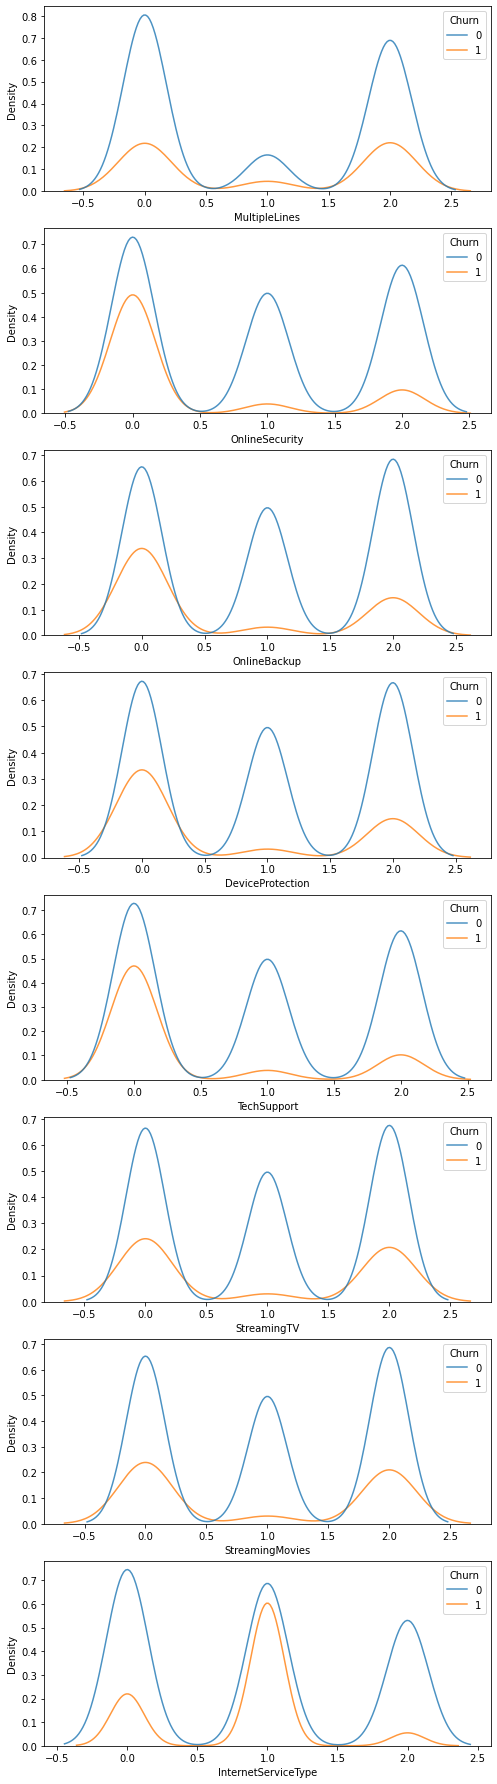

In [46]:
#Пользователи услуги интернет имеют большую тенденцию уйти к конкруенту, посмотрим какие именно услуги внутри могут являться причиной
#Можно сделать вывод, что информация об услугах StreamingTV и StreamingMovies нам не помогут, тогда как тип подключения - важен
#Гистограммы для 4 других признаков (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) имеют очень схожее
#интересное распределение. Среди тех, кто пользуется интернетом и не пользуется данными услугами, отток довольно значителен
columns = telecom_users.iloc[:, [4,6,7,8,9,10,11,17]].columns
fig, axs = plt.subplots(figsize = (8,32), nrows = 8, ncols = 1)
for i, each in enumerate(columns):
    sns.kdeplot(telecom_users[each].dropna(), label = each, hue=telecom_users['Churn'],
                shade = False, alpha = 0.8, ax=axs[i])
plt.show()

telecom_users = telecom_users.drop(['StreamingTV','StreamingMovies','MultipleLines'], axis=1)

In [47]:
# Категоризируем числовые значения выручки и стажа
telecom_users.MonthlyCharges = [0 if i <30 else 2 if i>70 else 1 for i in telecom_users.MonthlyCharges]
telecom_users.loc[(telecom_users['tenure'] < 20), 'tenure'] = 0
telecom_users.loc[(telecom_users['tenure'] > 20), 'tenure'] = 1

In [48]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 1869 to 860
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SeniorCitizen        5976 non-null   int64
 1   Dependents           5976 non-null   int64
 2   tenure               5976 non-null   int64
 3   PhoneService         5976 non-null   int64
 4   InternetService      5976 non-null   int64
 5   OnlineSecurity       5976 non-null   int8 
 6   OnlineBackup         5976 non-null   int8 
 7   DeviceProtection     5976 non-null   int8 
 8   TechSupport          5976 non-null   int8 
 9   Contract             5976 non-null   int8 
 10  PaperlessBilling     5976 non-null   int64
 11  PaymentMethod        5976 non-null   int8 
 12  MonthlyCharges       5976 non-null   int64
 13  Churn                5976 non-null   int64
 14  InternetServiceType  5976 non-null   int8 
dtypes: int64(8), int8(7)
memory usage: 590.1 KB


In [49]:
#В ходе разведочного анализа определены перспективные и неперспективные признаки для классификации, последние удалены из датасета
#Разобъем данные на тренировочные и тестовые
telecom_users = telecom_users.fillna('0')

x_train, x_valid, y_train, y_valid = train_test_split(telecom_users.drop(['Churn'], axis=1), 
                                                      telecom_users['Churn'], 
                                                      train_size=0.75, 
                                                      random_state=17)

y_valid.size

1494

# 3. Построение моделей для прогнозирования оттока

In [79]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

#Выберем несколько моделей, которые сравним между собой
#K-neighbors
#DecisionTree
#RandomForest
#GradientBoosting
#Метод опорных векторов (SVC)

#Нормализуем все данные, приведя к диапазону 0 - 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

#Проверим модели с параметрами по умолчанию

gbc = GradientBoostingClassifier(random_state=17)
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_valid)
gbc_score = classification_report(y_valid, gbc_pred)
#gbc_auc = roc_auc_score(y_valid, gbc_pred)
gbc_auc = roc_auc_score(y_valid, gbc.predict_proba(x_valid)[:, 1])
print("GBC:", gbc_auc)
print(gbc_score)
rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_valid)
rfc_score = classification_report(y_valid, rfc_pred)
#rfc_auc = roc_auc_score(y_valid, rfc_pred)
rfc_auc = roc_auc_score(y_valid, rfc.predict_proba(x_valid)[:, 1])
print("RFC:", rfc_auc)
print(rfc_score)
svc = SVC(random_state=17, probability=True)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)
svc_score = classification_report(y_valid, svc_pred)
#svc_auc = roc_auc_score(y_valid, svc_pred)
svc_auc = roc_auc_score(y_valid, svc.predict_proba(x_valid)[:, 1])
print("SVC:",svc_auc)
print(svc_score)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_valid)
knn_score = classification_report(y_valid, knn_pred)
#knn_auc = roc_auc_score(y_valid, knn_pred)
knn_auc = roc_auc_score(y_valid, knn.predict_proba(x_valid)[:, 1])
print("KNN:",knn_auc)
print(knn_score)
dtc = DecisionTreeClassifier(random_state=17)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)
dtc_score = classification_report(y_valid, dtc_pred)
#dtc_auc = roc_auc_score(y_valid, dtc_pred)
dtc_auc = roc_auc_score(y_valid, dtc.predict_proba(x_valid)[:, 1])
print("DTC:",dtc_auc)
print(dtc_score)

#Из логики задачи и исследованных гипотез следует, что более важно не пропустить уходящего клиента (так как уходят в основном платящие
#ежемесячно больше), чем допустить ложно-положительную ошибку
#Для оценки будем использовать метрику Recall, так как хотим штрафовать модель за FalseNegative, то есть за то, когда она
#предсказывает, что пользователь не уйдет (Churn = 0), а он уходит (Churn = 1)
#Все модели пока показывают довольно скромные результаты по данной метрике, пропуская около половины ушедших клиентов

GBC: 0.821226427008397
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1097
           1       0.62      0.52      0.57       397

    accuracy                           0.79      1494
   macro avg       0.73      0.70      0.71      1494
weighted avg       0.78      0.79      0.78      1494

RFC: 0.7723181380866985
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1097
           1       0.56      0.53      0.54       397

    accuracy                           0.76      1494
   macro avg       0.69      0.69      0.69      1494
weighted avg       0.76      0.76      0.76      1494

SVC: 0.7809046426135855
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1097
           1       0.60      0.46      0.52       397

    accuracy                           0.78      1494
   macro avg       0.71      0.67      0.69      1494
wei

In [101]:
from sklearn.ensemble import StackingClassifier
models = [('gbc', GradientBoostingClassifier(random_state=17)), ('rfc', RandomForestClassifier(random_state=17)),
         ('svc', SVC(random_state=17, probability=True)), ('knn', KNeighborsClassifier()),
          ('dtc', DecisionTreeClassifier(random_state=17))]

reg = StackingClassifier(estimators=models)

reg.fit(x_train, y_train)
pred = reg.predict(x_valid)
#auc = roc_auc_score(y_valid, pred)
auc = roc_auc_score(y_valid, reg.predict_proba(x_valid)[:, 1])
print('AUC score: {:.2f}'.format(auc))
print(classification_report(y_valid, pred))

AUC score: 0.82
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1097
           1       0.63      0.51      0.57       397

    accuracy                           0.79      1494
   macro avg       0.73      0.70      0.71      1494
weighted avg       0.78      0.79      0.78      1494



In [68]:
#Поиск лучших гиперпараметров (ничего не дал)

gbc_params = {
    'learning_rate': [1, 0.5, 0.1, 0.05],
    'n_estimators' : [1, 4, 16, 64, 100],
        'max_depth' : [1, 4, 8, 16],
            'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                'min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True)
             }
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)
grid_search_gbc.fit(x_train, y_train)
print("GBC: best params {}".format(grid_search_gbc.best_params_))

GBC: best params {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.55, 'n_estimators': 100}


In [77]:
gbc = GradientBoostingClassifier(random_state=17, learning_rate=0.5, n_estimators=100, max_depth=4, min_samples_leaf=0.1, min_samples_split=0.55 )
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_valid)
gbc_score = classification_report(y_valid, gbc_pred)
#gbc_auc = roc_auc_score(y_valid, gbc_pred)
gbc_auc = roc_auc_score(y_valid, gbc.predict_proba(x_valid)[:, 1])
print("AUC:",gbc_auc)
print(gbc_score)

AUC: 0.8146238080039678
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1097
           1       0.65      0.43      0.52       397

    accuracy                           0.79      1494
   macro avg       0.73      0.67      0.69      1494
weighted avg       0.77      0.79      0.77      1494



# 4. Сравнение качества моделей 

Сравнение качества произведено в п. 3




Были проанализированы данные по клиентам и построены модели для предсказания оттока клиентов на основе имеющихся признаков.
В качестве главного критерия использовалась метрика AUC ROC на выборке с predict proba (с вероятностями). Итоговый результат 81.5%. А на тестовых данных дошло до 84%

В ходе анализа были выделены признаки и описаны наиболее явные закономерности:
- большую склонность уйти показывают клиенты с бОльшими месячными платежами, подключенные по оптике, с месячными контрактами и
способом оплаты электронными чеками. Остальные признаки лишь уточняют данную модель.